In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [2]:
# data preparation
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

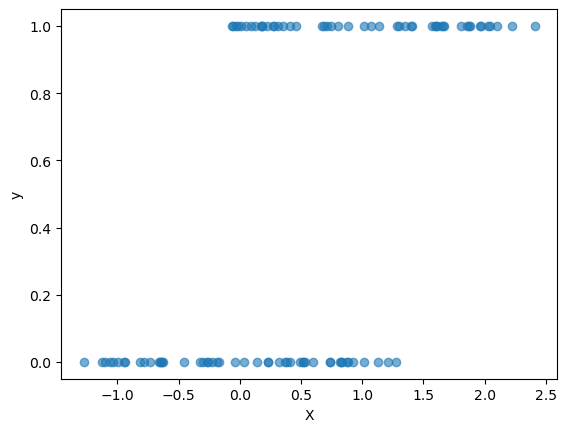

In [16]:
# data distribution
plt.scatter(X[:,0],y, alpha=0.6)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [21]:
# model
poly_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=1, max_iter=10_000, dual=False, random_state=42)
)

In [22]:
# training
poly_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=1, dual=False, max_iter=10000, random_state=42))])

#### Adding polynomial feature is so simple, and can work fine with all sorts of ML algorithms not just SVMs. Low polynomial degree makes the SVM model complex where high polynomial degree makes the model slower. Instead of applying polynomial feature, we can apply kernel trick that does same thing.

In [29]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)
)
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

##### You can reduce polynomial degree if your model is overfitting. The coef0 parameters here control how much the model is influenced by high-degree terms vs low-degree terms.